# ĐỀ BÀI

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Hãy sử dụng dữ liệu được cung cấp trong email này (dữ liệu giá và khối
lượng của một vài mã cổ phiếu) để xây dựng một số mô hình dự đoán biến
động giá cổ phiếu.

Biến động giá cổ phiếu = Giá cổ phiếu N (phút hoặc giờ hoặc ngày) sau
- Giá cổ phiếu hiện tại.


## IMPORT THƯ VIỆN

In [1]:
import pandas as pd
import numpy as np
import sklearn
import os
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

## LẤY FILES

In [2]:
list_name = []
for root, dirs, files in os.walk(r'/content/drive/MyDrive'):
  for name in files:
    if name.endswith(".csv"):
      list_name.append(os.path.join(root, name))
list_name = sorted(list_name)
print(list_name)

['/content/drive/MyDrive/FPT.csv', '/content/drive/MyDrive/MSN.csv', '/content/drive/MyDrive/PNJ.csv', '/content/drive/MyDrive/VIC.csv']


## ĐỌC FILES

In [3]:
df_fpt = pd.read_csv(list_name[0])
df_msn = pd.read_csv(list_name[1])
df_pnj = pd.read_csv(list_name[2])
df_vic = pd.read_csv(list_name[3])
display(df_msn,df_pnj, df_vic, df_fpt)

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210,0
1,MSN,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000,0
2,MSN,12/25/2017 9:18,73.5,73.5,73.5,73.5,210,0
3,MSN,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050,0
4,MSN,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380,0
...,...,...,...,...,...,...,...,...
135349,MSN,12/22/2020 14:23,82.8,82.8,82.8,82.8,700,0
135350,MSN,12/22/2020 14:24,82.7,82.8,82.7,82.8,4660,0
135351,MSN,12/22/2020 14:25,82.8,82.8,82.8,82.8,50,0
135352,MSN,12/22/2020 14:27,82.8,82.8,82.8,82.8,300,0


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2/28/2018 9:15,78.14,78.99,78.14,78.99,270,0
1,PNJ,2/28/2018 9:16,78.94,78.94,78.94,78.94,10,0
2,PNJ,2/28/2018 9:19,78.14,78.14,78.14,78.14,283,0
3,PNJ,2/28/2018 9:20,78.14,78.14,78.14,78.14,480,0
4,PNJ,2/28/2018 9:21,78.14,78.14,78.14,78.14,146,0
...,...,...,...,...,...,...,...,...
125304,PNJ,12/22/2020 14:22,78.20,78.20,78.20,78.20,5000,0
125305,PNJ,12/22/2020 14:23,78.20,78.20,78.20,78.20,1700,0
125306,PNJ,12/22/2020 14:24,78.20,78.20,78.20,78.20,870,0
125307,PNJ,12/22/2020 14:25,78.10,78.10,78.10,78.10,13000,0


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,10/17/2018 9:39,98.5,98.5,98.5,98.5,390,0
1,VIC,10/17/2018 9:40,98.5,98.5,98.5,98.5,760,0
2,VIC,10/17/2018 9:41,98.6,98.6,98.6,98.6,2060,0
3,VIC,10/17/2018 9:42,98.6,98.6,98.6,98.6,5540,0
4,VIC,10/17/2018 9:43,98.6,98.7,98.6,98.7,760,0
...,...,...,...,...,...,...,...,...
101261,VIC,12/22/2020 14:22,105.8,105.8,105.7,105.7,1870,0
101262,VIC,12/22/2020 14:23,105.7,105.7,105.7,105.7,2510,0
101263,VIC,12/22/2020 14:24,105.7,105.7,105.7,105.7,3620,0
101264,VIC,12/22/2020 14:25,105.7,105.7,105.7,105.7,100,0


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0
...,...,...,...,...,...,...,...,...
97401,FPT,12/22/2020 14:24,58.20,58.20,58.20,58.20,27470,0
97402,FPT,12/22/2020 14:25,58.20,58.20,58.20,58.20,14820,0
97403,FPT,12/22/2020 14:26,58.20,58.20,58.20,58.20,500,0
97404,FPT,12/22/2020 14:29,58.10,58.10,58.10,58.10,2500,0


## KIỂM TRA DỮ LIỆU

In [ ]:
display( df_msn.describe(), df_pnj.describe(), df_vic.describe(), df_fpt.describe())

,Open,High,Low,Close,Volume,Open Interest
count,101266.000000,101266.000000,101266.000000,101266.000000,1.012660e+05,101266.0
mean,105.376460,105.418519,105.334147,105.378791,3.182640e+03,0.0
std,11.543158,11.535584,11.552338,11.545054,1.469814e+04,0.0
min,68.000000,68.000000,68.000000,68.000000,1.000000e+01,0.0
25%,95.400000,95.400000,95.300000,95.400000,2.300000e+02,0.0
50%,105.300000,105.300000,105.200000,105.300000,1.020000e+03,0.0
75%,115.800000,115.900000,115.800000,115.800000,3.000000e+03,0.0
max,126.100000,126.500000,126.100000,126.500000,1.468390e+06,0.0


,Open,High,Low,Close,Volume,Open Interest
count,97406.000000,97406.000000,97406.000000,97406.000000,9.740600e+04,97406.0
mean,45.071630,45.090138,45.051430,45.071631,8.044173e+03,0.0
std,6.359803,6.364950,6.354245,6.359799,1.753203e+04,0.0
min,30.250000,30.250000,30.220000,30.250000,1.000000e+01,0.0
25%,39.740000,39.740000,39.700000,39.740000,7.500000e+02,0.0
50%,46.950000,46.950000,46.950000,46.950000,2.960000e+03,0.0
75%,49.200000,49.250000,49.170000,49.200000,8.960000e+03,0.0
max,58.400000,58.500000,58.400000,58.400000,1.255930e+06,0.0


,Open,High,Low,Close,Volume,Open Interest
count,135354.000000,135354.000000,135354.000000,135354.000000,1.353540e+05,135354.0
mean,74.878809,74.931668,74.834625,74.880759,5.683578e+03,0.0
std,15.418074,15.426954,15.412677,15.418857,2.798513e+04,0.0
min,46.500000,46.500000,46.400000,46.400000,1.000000e+01,0.0
25%,57.900000,57.900000,57.800000,57.800000,5.000000e+02,0.0
50%,79.100000,79.200000,79.100000,79.100000,2.000000e+03,0.0
75%,86.000000,86.100000,86.000000,86.000000,5.560000e+03,0.0
max,117.800000,118.000000,117.700000,118.000000,3.300680e+06,0.0


,Open,High,Low,Close,Volume,Open Interest
count,125309.000000,125309.000000,125309.000000,125309.000000,125309.000000,125309.0
mean,72.182052,72.372590,72.042287,72.179371,3031.830451,0.0
std,9.900263,9.995786,9.830847,9.899401,7248.952968,0.0
min,44.430000,44.530000,44.040000,44.140000,1.000000,0.0
25%,64.600000,64.700000,64.570000,64.600000,220.000000,0.0
50%,72.800000,73.010000,72.640000,72.830000,1000.000000,0.0
75%,80.160000,80.350000,80.060000,80.160000,3130.000000,0.0
max,100.160000,100.160000,100.160000,100.160000,580730.000000,0.0


In [ ]:
display( df_msn.info(), df_pnj.info(), df_vic.info(), df_fpt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101266 entries, 0 to 101265
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         101266 non-null  object 
 1   Date/Time      101266 non-null  object 
 2   Open           101266 non-null  float64
 3   High           101266 non-null  float64
 4   Low            101266 non-null  float64
 5   Close          101266 non-null  float64
 6   Volume         101266 non-null  int64  
 7   Open Interest  101266 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         97406 non-null  object 
 1   Date/Time      97406 non-null  object 
 2   Open           97406 non-null  float64
 3   High           97406 non-null  float64
 4   L

None

None

None

None

## FPT

### Chuyển ngày tháng

In [4]:
df_fpt['Date/Time'] = pd.to_datetime(df_fpt['Date/Time'])
df_fpt.set_index('Date/Time', inplace=True)

df_fpt['DayOfWeek'] = df_fpt.index.dayofweek
df_fpt['Month'] = df_fpt.index.month
df_fpt['Day'] = df_fpt.index.day
df_fpt['Hours'] = df_fpt.index.hour
df_fpt['Mins'] = df_fpt.index.minute
df_fpt

,Ticker,Open,High,Low,Close,Volume,Open Interest,DayOfWeek,Month,Day,Hours,Mins
Date/Time,,,,,,,,,,,,
2018-12-25 09:15:00,FPT,30.89,30.89,30.89,30.89,35410,0,1,12,25,9,15
2018-12-25 09:16:00,FPT,30.81,30.81,30.81,30.81,190,0,1,12,25,9,16
2018-12-25 09:17:00,FPT,30.74,30.81,30.74,30.74,1120,0,1,12,25,9,17
2018-12-25 09:18:00,FPT,30.74,30.74,30.74,30.74,2120,0,1,12,25,9,18
2018-12-25 09:19:00,FPT,30.74,30.74,30.74,30.74,22500,0,1,12,25,9,19
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22 14:24:00,FPT,58.20,58.20,58.20,58.20,27470,0,1,12,22,14,24
2020-12-22 14:25:00,FPT,58.20,58.20,58.20,58.20,14820,0,1,12,22,14,25
2020-12-22 14:26:00,FPT,58.20,58.20,58.20,58.20,500,0,1,12,22,14,26


In [9]:
N = 5  # Number of periods ahead to calculate the volatility
df_fpt['Volatility'] =df_fpt['Close'].shift(-N) - df_fpt['Close']
# Create moving averages
df_fpt['MA5'] = df_fpt['Close'].rolling(window=5).mean()
df_fpt['MA10'] = df_fpt['Close'].rolling(window=10).mean()


In [ ]:
# Check for missing values
print(df_fpt.isnull().sum())

Ticker            0
Open              0
High              0
Low               0
Close             0
Volume            0
Open Interest     0
DayOfWeek         0
Month             0
Day               0
Hours             0
Mins              0
Volatility       20
MA5               4
MA10              9
dtype: int64


In [11]:
df_fpt['MA5'].fillna(method='bfill', inplace=True)
df_fpt['MA10'].fillna(method='bfill', inplace=True)
df_fpt['Volatility'].fillna(df_fpt['Volatility'].mean(), inplace=True)

df_fpt.isnull().sum()

<ipython-input-11-f991b7681984>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fpt['MA5'].fillna(method='bfill', inplace=True)
<ipython-input-11-f991b7681984>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fpt['MA10'].fillna(method='bfill', inplace=True)


,0
Ticker,0
Open,0
High,0
Low,0
Close,0
Volume,0
Open Interest,0
DayOfWeek,0
Month,0
Day,0


In [12]:
# Train-test split
train_size = int(len(df_fpt) * 0.8)
train, test = df_fpt.iloc[:train_size], df_fpt.iloc[train_size:]

scaler = MinMaxScaler(feature_range=(0,1))

X_train = train.drop(columns=['Volatility','Ticker','Close'])

y_train = train['Volatility']


X_test = test.drop(columns=['Volatility', 'Ticker','Close'])


y_test = test['Volatility']


### XGB

In [13]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions
predictions = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')


MSE: 0.038194777681269644


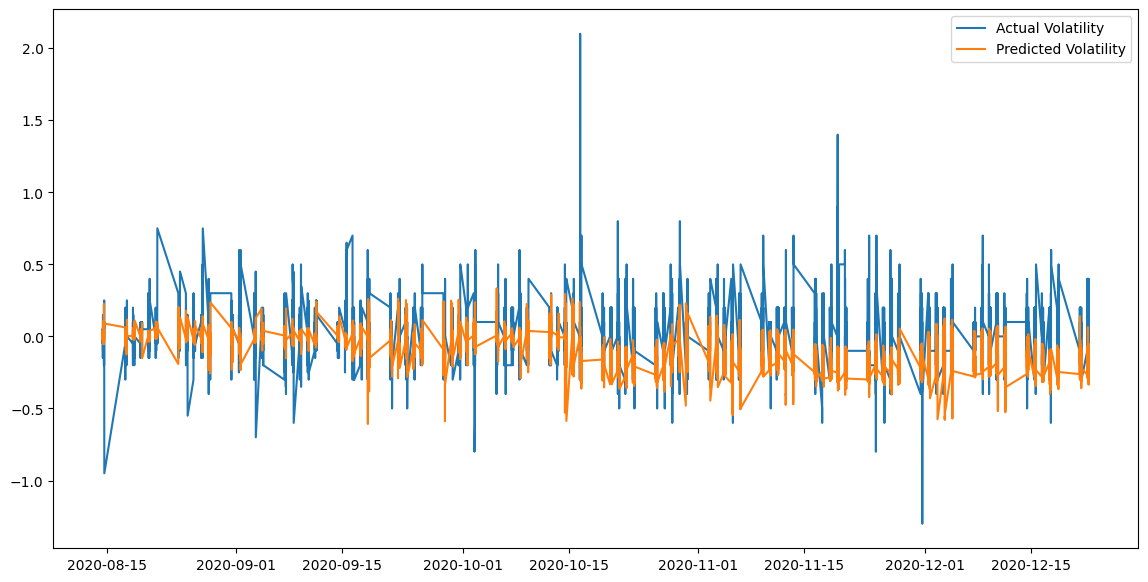

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(test.index, y_test, label='Actual Volatility')
plt.plot(test.index, predictions, label='Predicted Volatility')
plt.legend()
plt.show()


### LSTM

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf



In [18]:
df_fpt.columns

Index(['Ticker', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open Interest',
       'DayOfWeek', 'Month', 'Day', 'Hours', 'Mins', 'Volatility', 'MA5',
       'MA10'],
      dtype='object')

In [19]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Open Interest',
       'DayOfWeek', 'Month', 'Day', 'Hours', 'Mins', 'MA5',
       'MA10']
target = 'Volatility'

# Normalize the features
scaler = MinMaxScaler()
df_fpt[features] = scaler.fit_transform(df_fpt[features])


In [20]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[features].iloc[i:(i + seq_length)].values
        y = data[target].iloc[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 100  # Number of time steps to look back
X, y = create_sequences(df_fpt, seq_length)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [21]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences=True, input_shape=(seq_length, len(features))))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


In [ ]:
# Evaluate the model
predictions = model.predict(X_test)

609/609 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step


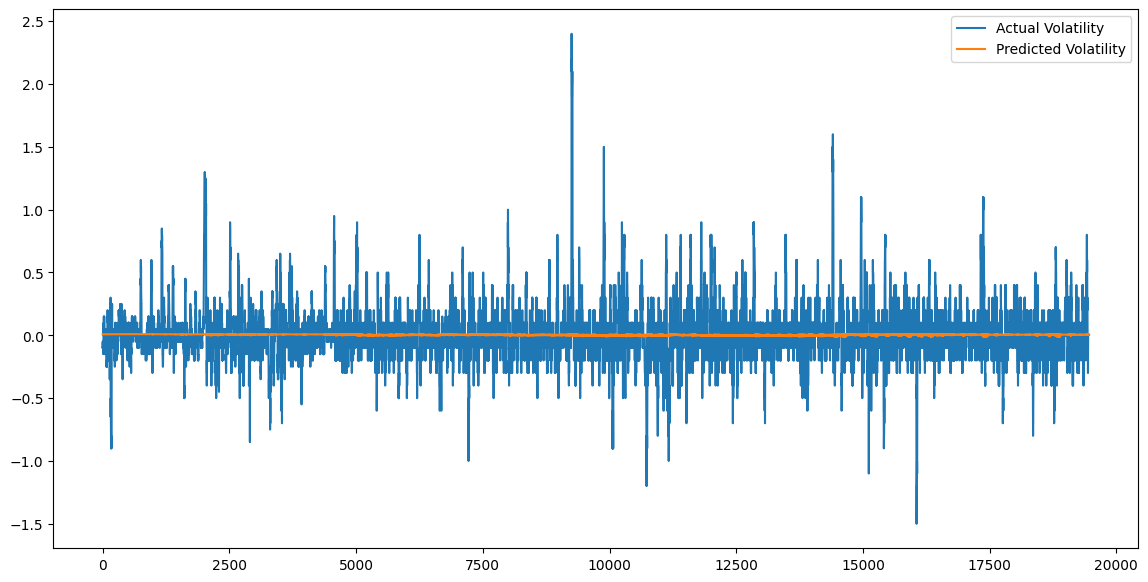

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Volatility')
plt.plot(predictions, label='Predicted Volatility')
plt.legend()
plt.show()